## Imports

In [1]:
from numpy.random import seed
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

#from tensorflow import set_random_seed(404)
# set_random_seed(404)

In [74]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

from time import strftime

import itertools

import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [4]:
type(cifar10)

module

In [5]:
type(x_train_all)

numpy.ndarray

## Constants

In [69]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES=10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000


## Explore the Data

In [7]:
x_train_all[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

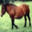

In [8]:
pic = array_to_img(x_train_all[7])
display(pic)

In [9]:
y_train_all.shape

(50000, 1)

In [10]:
y_train_all[7][0]

7

In [11]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

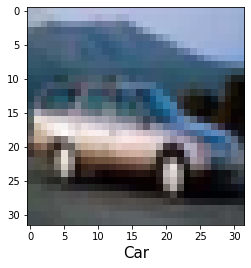

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from x_train_all array in a row. Show the name of the label below the picture. Remove the ugly tick marks. Hint us matplotlib

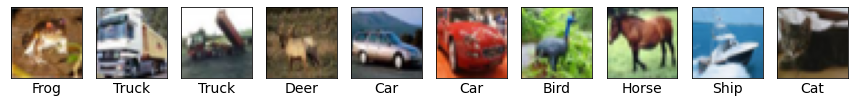

In [13]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [14]:
x_train_all.shape

(50000, 32, 32, 3)

In [15]:
x_train_all[0].shape

(32, 32, 3)

In [16]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| channels = 3


## Preprocess Data

In [17]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [18]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [19]:
type(x_train_all[0][0][0][0])

numpy.float64

In [20]:
x_train_all[0][0][0][0]

0.23137254901960785

In [21]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [22]:
x_train_all.shape

(50000, 3072)

In [23]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


## Create Validation Dataset

In [24]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays x_train and y_train that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from x_train_all and y_train_all respectively

In [25]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset for illustrarion

In [26]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## Define the Neural Network using Keras

In [27]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [28]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

**Challenge:** Create a third model, model_3 that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rae 25%

In [29]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [30]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [31]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


**how did Params become 393344?** 
32 * 32 * 3 * 128 + 128 = 393344

**how did Params become 402810?** 
(32 * 32 * 3 * 128 + 128) + (128 * 64 + 64) + (64 * 16 + 16) + (16 * 10 + 10) = 402810

## Tensorboard (visualizing learning)

In [32]:
def get_tensorboard(model_name):

    folder_name = f'model_1 at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

## Fit the Model

In [33]:
samples_per_batch = 1000

In [34]:
# %%time
# nr_epochs = 150

# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, 
 #           callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

In [35]:
%%time
nr_epochs = 100

model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Wall time: 1min 3s


In [36]:
%%time
nr_epochs = 100

model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 15s


In [37]:
%%time
nr_epochs = 100

model_3.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 45.7 s


## Predictions on Individual Images

In [39]:
x_val[0].shape

(3072,)

In [41]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [42]:
model_2.predict(test)

array([[0.05098156, 0.06793843, 0.02805786, 0.16978219, 0.1920979 ,
        0.05809374, 0.07368162, 0.21976335, 0.03480336, 0.1047999 ]],
      dtype=float32)

In [43]:
np.set_printoptions(precision=3)

In [44]:
model_2.predict(test)

array([[0.051, 0.068, 0.028, 0.17 , 0.192, 0.058, 0.074, 0.22 , 0.035,
        0.105]], dtype=float32)

In [46]:
model_2.predict(x_val).shape

(10000, 10)

In [47]:
model_2.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7], dtype=int64)

In [48]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop whre you print out the actual value and the predicted value for the first 10 images in the valuation dataset.

In [52]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 7
Actual value: 9 vs. predicted: 8
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 7
Actual value: 2 vs. predicted: 4
Actual value: 7 vs. predicted: 4
Actual value: 8 vs. predicted: 0
Actual value: 3 vs. predicted: 9


## Evaluation

In [53]:
model_2.metrics_names

['loss', 'accuracy']

In [55]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 2.1957 - accuracy: 0.2205
Test loss is 2.2 and test accuracy is 22.1%


## Confusion Matrix

In [59]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [60]:
conf_matrix.shape

(10, 10)

In [62]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [63]:
conf_matrix.max()

544

In [65]:
conf_matrix.min()

0

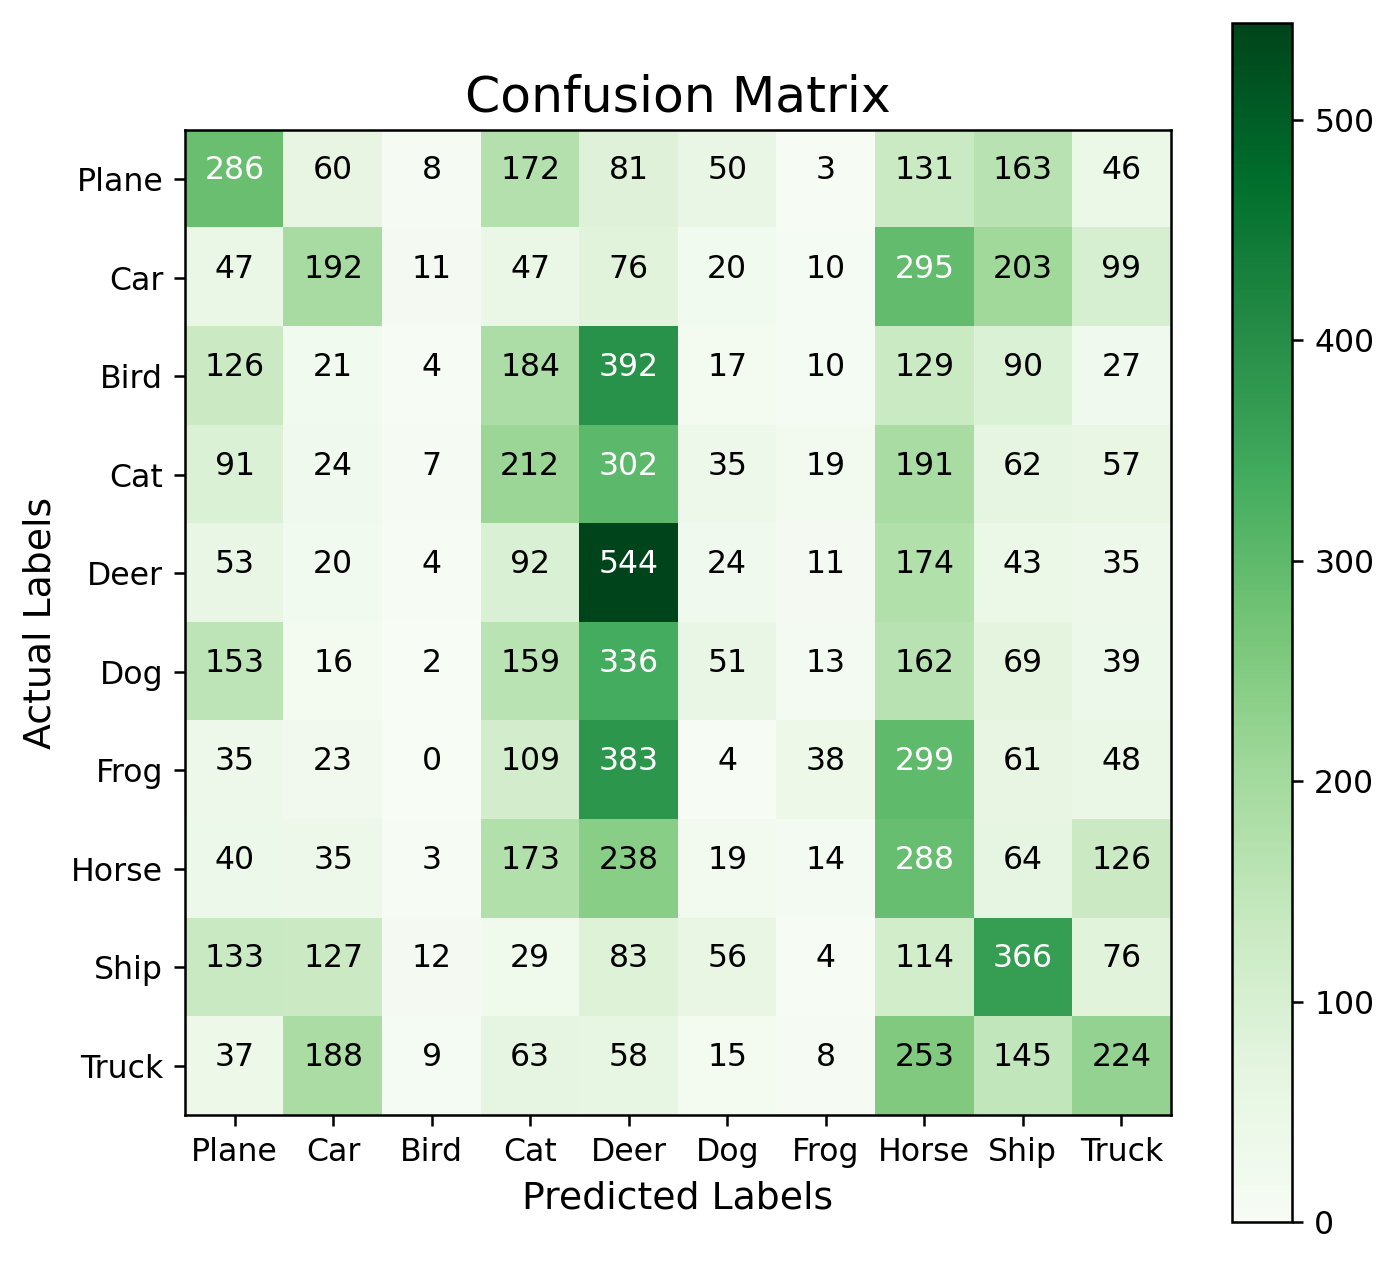

In [84]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j,  i, conf_matrix[i, j], horizontalalignment='center', 
             color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the other numbers including the number in the diagonal in a single row represent? Try to identify the false positives, false negatives and the true positives in the confusion matrix

In [85]:
# True positives
np.diag(conf_matrix)

array([286, 192,   4, 212, 544,  51,  38, 288, 366, 224], dtype=int64)

In [86]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.286, 0.192, 0.004, 0.212, 0.544, 0.051, 0.038, 0.288, 0.366,
       0.224])

In [87]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.286, 0.272, 0.067, 0.171, 0.218, 0.175, 0.292, 0.141, 0.289,
       0.288])

In [88]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 22.05%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the mode as a whole

In [89]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision + avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f-score is {f1_score:.2%}')

Model 2 precision score is 22.00%
Model 2 f-score is 200.00%
